# SIMPLE LINEAR MODEL

# INTRODUCTION

This code is to show the basic workflow of tensorflow with mnist dataset using a simple linear model.
MNIST dataset contains a large set of handwritten images 

knowleedge of python and jupyter notebook is needed




# IMPORT STATEMENTS

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [36]:
tf.__version__

'1.11.0'

tensorflow version is 1.11 and anacnda version is 3.6

# dataset

In [37]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The above code will download the mnist dataset and the labels will be one hot encoded for you

The output-data is loaded as both integer class-numbers and so-called One-Hot encoded arrays. This means the class-numbers have been converted from a single integer to a vector whose length equals the number of possible classes. All elements of the vector are zero except for the $i$'th element which is 1 and means the class is $i$

the MNIST dataset consists of 70,000 images and the dataset is split into three subsets

# alternative source of dataset

http://yann.lecun.com/exdb/mnist/

In [38]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [39]:
print("training set :",mnist.train.num_examples)
print("test set :",mnist.test.num_examples)
print("validation set :",mnist.validation.num_examples)

training set : 55000
test set : 10000
validation set : 5000


We only use training and test sets in this code

# Data Visualization

In [40]:
mnist.train.images.shape

(55000, 784)

So  train set has 55000 images .each images is 784 pixel(28*28)

In [41]:
mnist.train.images[1].shape

(784,)

784 pixels means these images are flattened out images to use imshow method we convert them into 28*28 pixels using reshape

we wont use reshaped images for training purposes its only for visualization purpose only

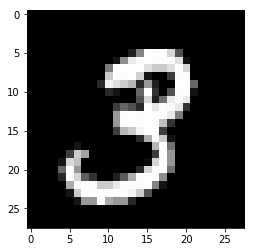

In [42]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap = 'gist_gray')

# Normalization

mnist dataset is contains only normalized images 
however u can check whether it is normalized if its min and max values lies between 0 and 1

In [43]:
mnist.train.images[1].max()

1.0

In [44]:
mnist.train.images[1].min()

0.0

# tensorflow graph


The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. TensorFlow can be more efficient than NumPy because TensorFlow knows the entire computation graph that must be executed, while NumPy only knows the computation of a single mathematical operation at a time.

TensorFlow can also automatically calculate the gradients that are needed to optimize the variables of the graph so as to make the model perform better. This is because the graph is a combination of simple mathematical expressions so the gradient of the entire graph can be calculated using the chain-rule for derivatives.

TensorFlow can also take advantage of multi-core CPUs as well as GPUs - and Google has even built special chips just for TensorFlow which are called TPUs (Tensor Processing Units) that are even faster than GPUs.

A TensorFlow graph consists of the following parts which will be detailed below:

Placeholder variables used to feed input into the graph.
Model variables that are going to be optimized so as to make the model perform better.
The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
A cost measure that can be used to guide the optimization of the variables.
An optimization method which updates the variables of the model.

# Placeholder Variables

->Placeholders are initially empty and are used to feed in the triaining images
-> They do need a adeclared expected data type(tf.float32) with an optional shape argument

->First we define the placeholder for input images This allows us to change the images that are input to the TensorFlow graph. This is a so-called tensor, which just means that it is a multi-dimensional vector or matrix. The data-type is set to float32 and the shape is set to [None, img_size_flat], where None means that the tensor may hold an arbitrary number of images with each image being a vector of length img_size_flat.

->here the img size_flat which means the flattened size of our image is 784

In [45]:
x = tf.placeholder(tf.float32,shape=[None,784])

Next we have the placeholder variable for the true labels associated with the images that were input in the placeholder variable x. 
The shape of this placeholder variable is [None, num_classes] which means it may hold an arbitrary number of labels and each label is a vector of length num_classes which is 10 in this case.

In [46]:
y_true = tf.placeholder(tf.float32,shape=[None,10])


Finally we have the placeholder variable for the true class of each image in the placeholder variable x.
These are integers and the dimensionality of this placeholder variable is set to [None] which means the placeholder variable is a one-dimensional vector of arbitrary length.

In [47]:
y_true_cls = tf.placeholder(tf.int64, [None])

# Variables to be optimized


Apart from the placeholder variables that were defined above and which serve as feeding input data into the model, there are also some model variables that must be changed by TensorFlow so as to make the model perform better on the training data.

The first variable that must be optimized is called weights and is defined here as a TensorFlow variable that must be initialized with zeros and whose shape is [img_size_flat, num_classes], so it is a 2-dimensional tensor (or matrix) with img_size_flat rows and num_classes columns.

In [48]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

The second variable that must be optimized is called biases and is defined as a 1-dimensional tensor (or vector) of length num_classes.

In [49]:
b = tf.Variable(tf.zeros([10]))

# model

Our model will multiply the images in the input placeholder x with the weight w and add with it the bias term

input tem X has shape [num_images, img_size_flat] & weight term W has shape [img_size_flat, num_classes] ,
so the result of matrix mul Y will be in shape[num_images,num_classes]


In [50]:
y = tf.matmul(x,W) + b 

->A softmax regression returns a list of values between 0 and 1 that add up to one

->we can use this a list of probabilities(normalization)

In [56]:
y_pred = tf.nn.softmax(y)

Argmax returns the index of the maximum valued element ,so y_pred_class will return the class of highest probability value

In [59]:
y_pred_cls = tf.argmax(y_pred, axis=1)

# Cost function optimization

Changing the values of weights and bias(hyperparameters) will impact the performance of our model

The cross-entropy is a performance measure used in classification. The cross-entropy is a continuous function that is always positive and if the predicted output of the model exactly matches the desired output then the cross-entropy equals zero. The goal of optimization is therefore to minimize the cross-entropy so it gets as close to zero as possible by changing the weights and biases of the model.

In [60]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




We have now calculated the cross-entropy for each of the image classifications so we have a measure of how well the model performs on each image individually. But in order to use the cross-entropy to guide the optimization of the model's variables we need a single scalar value, so we simply take the average of the cross-entropy for all the image classifications.

In [61]:
cost = tf.reduce_mean(cross_entropy)

# Optimizer

To reduce the cost error we use optimizer,here we use the gradient descent with step size==0.5

In [64]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimizeize(cost)

# Creating tensorflow session

In tensorflow to execute a graph it must be run inside a session

In [74]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Variable initialization

The variable terms weigts and bias must be initialized before runing

In [75]:
init = tf.global_variables_initializer()

In [76]:
train = optimizer.minimize(cross_entropy)

since there are 55,000 images we use stochastic gradientdescent which takes inputs in batches where each batch contains 100 images

Function for performing a number of optimization iterations so as to gradually improve the weights and biases of the model. In each iteration, a new batch of data is selected from the training-set and then TensorFlow executes the optimizer using those training samples.

In [77]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9166


Matches vector tells whether the predicted class equals the true class of each image.

Acc(accuracy) calculates the classification accuracy by first type-casting the vector of booleans to floats, so that False becomes 0 and True becomes 1, and then calculating the average of these numbers

In [78]:
pwd

'C:\\Users\\HP\\Desktop\\cnn'